In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Google Data

In [2]:
google_us = pd.read_csv('../raw_data/google_data/mobility_report_US.csv')
print(google_us.shape)
google_us.head()

(155060, 9)


,state,county,date,retail,grocery and pharmacy,parks,transit stations,workplaces,residential
0,Total,Total,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,Total,Total,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,Total,Total,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,Total,Total,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,Total,Total,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


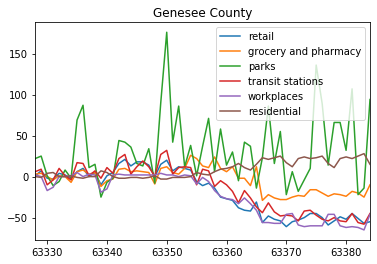

In [3]:
# easy way to index 
mi_index = google_us['state'] == 'Michigan' 
gen_index = google_us['county'] == 'Genesee County'
mi_gen_index = mi_index * gen_index
google_us[mi_gen_index].plot(title ='Genesee County')

In [4]:
google_us[mi_gen_index].head()

,state,county,date,retail,grocery and pharmacy,parks,transit stations,workplaces,residential
63328,Michigan,Genesee County,2020-02-15,1.0,3.0,22.0,6.0,2.0,0.0
63329,Michigan,Genesee County,2020-02-16,7.0,4.0,25.0,9.0,0.0,-1.0
63330,Michigan,Genesee County,2020-02-17,-2.0,0.0,1.0,-10.0,-17.0,4.0
63331,Michigan,Genesee County,2020-02-18,-3.0,-4.0,-11.0,-4.0,-13.0,5.0
63332,Michigan,Genesee County,2020-02-19,4.0,1.0,-6.0,10.0,0.0,0.0


In [5]:
# a different way to index
data = google_us.values
ny_index = np.where(data == 'New York')[0]

In [6]:
ny_df = google_us.iloc[ny_index]
ny_df.head()

,state,county,date,retail,grocery and pharmacy,parks,transit stations,workplaces,residential
89512,New York,Total,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
89513,New York,Total,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
89514,New York,Total,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
89515,New York,Total,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
89516,New York,Total,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0


In [7]:
# print out all of the counties 
ny_df['county'].unique()

array(['Total', 'Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Herkimer County',
       'Jefferson County', 'Kings County', 'Lewis County',
       'Livingston County', 'Madison County', 'Monroe County',
       'Montgomery County', 'Nassau County', 'New York County',
       'Niagara County', 'Oneida County', 'Onondaga County',
       'Ontario County', 'Orange County', 'Orleans County',
       'Oswego County', 'Otsego County', 'Putnam County', 'Queens County',
       'Rensselaer County', 'Richmond County', 'Rockland County',
       'Saratoga County', 'Schenectady County', 'Schoharie County',
       'Schuyler County', 'Seneca County', 'S

In [8]:
nyny_df = ny_df.set_index("county").loc['New York County']

In [9]:
# lets look at NY County (Manhattan)
ny_county = ny_df.set_index("county").loc['New York County'].reset_index()
ny_county.head()

,county,state,date,retail,grocery and pharmacy,parks,transit stations,workplaces,residential
0,New York County,New York,2020-02-15,2.0,-5.0,0.0,-1.0,0.0,0.0
1,New York County,New York,2020-02-16,6.0,-2.0,4.0,1.0,-2.0,0.0
2,New York County,New York,2020-02-17,-5.0,-12.0,13.0,-25.0,-51.0,10.0
3,New York County,New York,2020-02-18,0.0,-2.0,5.0,-5.0,-6.0,2.0
4,New York County,New York,2020-02-19,2.0,-1.0,15.0,-1.0,-4.0,1.0


In [10]:
ny_county_df = ny_county.T  #need to transpose the data
ny_county_df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
county,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County,...,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County,New York County
state,New York,New York,New York,New York,New York,New York,New York,New York,New York,New York,...,New York,New York,New York,New York,New York,New York,New York,New York,New York,New York
date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11
retail,2,6,-5,0,2,3,-2,6,0,1,...,-84,-85,-85,-85,-83,-85,-87,-87,-88,-86
grocery and pharmacy,-5,-2,-12,-2,-1,-1,-5,4,2,1,...,-47,-50,-43,-47,-48,-47,-49,-51,-50,-42
parks,0,4,13,5,15,6,-7,25,18,17,...,-67,-79,-62,-67,-61,-60,-65,-72,-77,-61
transit stations,-1,1,-25,-5,-1,-1,-4,5,1,1,...,-79,-79,-77,-78,-79,-80,-81,-81,-81,-78
workplaces,0,-2,-51,-6,-4,-5,-5,7,2,4,...,-78,-78,-57,-56,-77,-78,-79,-80,-79,-55
residential,0,0,10,2,1,1,2,-1,-1,0,...,33,34,19,18,31,32,32,34,35,19


In [11]:
ny_county_df.drop(['county','state'],inplace = True)
ny_county_df.columns = ny_county_df.loc['date']
ny_county_df.drop('date', inplace = True)

In [12]:
ny_county_df

date,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,...,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11
retail,2,6,-5,0,2,3,-2,6,0,1,...,-84,-85,-85,-85,-83,-85,-87,-87,-88,-86
grocery and pharmacy,-5,-2,-12,-2,-1,-1,-5,4,2,1,...,-47,-50,-43,-47,-48,-47,-49,-51,-50,-42
parks,0,4,13,5,15,6,-7,25,18,17,...,-67,-79,-62,-67,-61,-60,-65,-72,-77,-61
transit stations,-1,1,-25,-5,-1,-1,-4,5,1,1,...,-79,-79,-77,-78,-79,-80,-81,-81,-81,-78
workplaces,0,-2,-51,-6,-4,-5,-5,7,2,4,...,-78,-78,-57,-56,-77,-78,-79,-80,-79,-55
residential,0,0,10,2,1,1,2,-1,-1,0,...,33,34,19,18,31,32,32,34,35,19


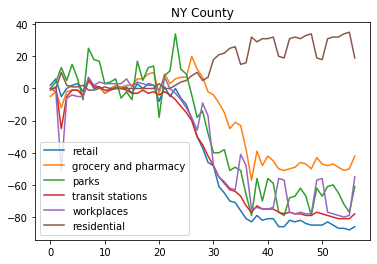

In [13]:
t = range(len(ny_county_df.columns )) # set to just ny_county_df.columns 


for i in range(ny_county_df.shape[0]): 
    sector = ny_county_df.index[i]
    #if sector in ['residential', 'workplaces']: 
    plt.plot(t, ny_county_df.loc[sector], label = sector)

plt.legend()
plt.title("NY County")
plt.show()

In [14]:
# create a function that will return time series data 
# essentially doing what I did above 
google_us = pd.read_csv('../raw_data/google_data/mobility_report_US.csv')

def get_data(state, county): 
    # easy way to index 
    state_idx = google_us['state'] == state
    county_idx = google_us['county'] == county
    state_county_idx = state_idx * county_idx
    df = google_us[state_county_idx].T

    df.drop(['county','state'],inplace = True)
    df.columns = df.loc['date']
    df.drop('date', inplace = True)
    if df.shape[1] < 1: 
        print("Bad Input ")
        return
    return df 




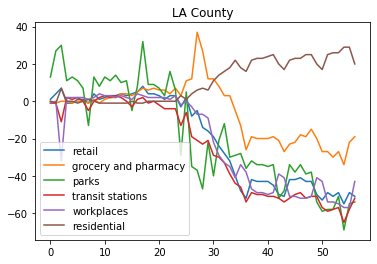

In [15]:
# example 
la_df = get_data('California', 'Los Angeles County')
for i in range(la_df.shape[0]): 
    sector = la_df.index[i]
    plt.plot(t, la_df.loc[sector], label = sector)

plt.legend()
plt.title("LA County")
plt.show()

In [16]:
# let's see how many people are going to parks vs staying at home
# (very inefficient code but too lazy)
fl_idx = google_us['state'] == 'Florida'
fl_df = google_us[fl_idx]
fl_counties = fl_df['county'].unique()

res = []
parks = []
for county in fl_counties: 
    county_df = get_data('Florida', county)
    res_data = county_df.loc['residential'][-1:][0] # loc on the very last day
    parks_data = county_df.loc['parks'][-1:][0]
    if not (pd.isnull(res_data) and pd.isnull(parks_data)): 
        res.append(res_data)
        parks.append(parks_data)

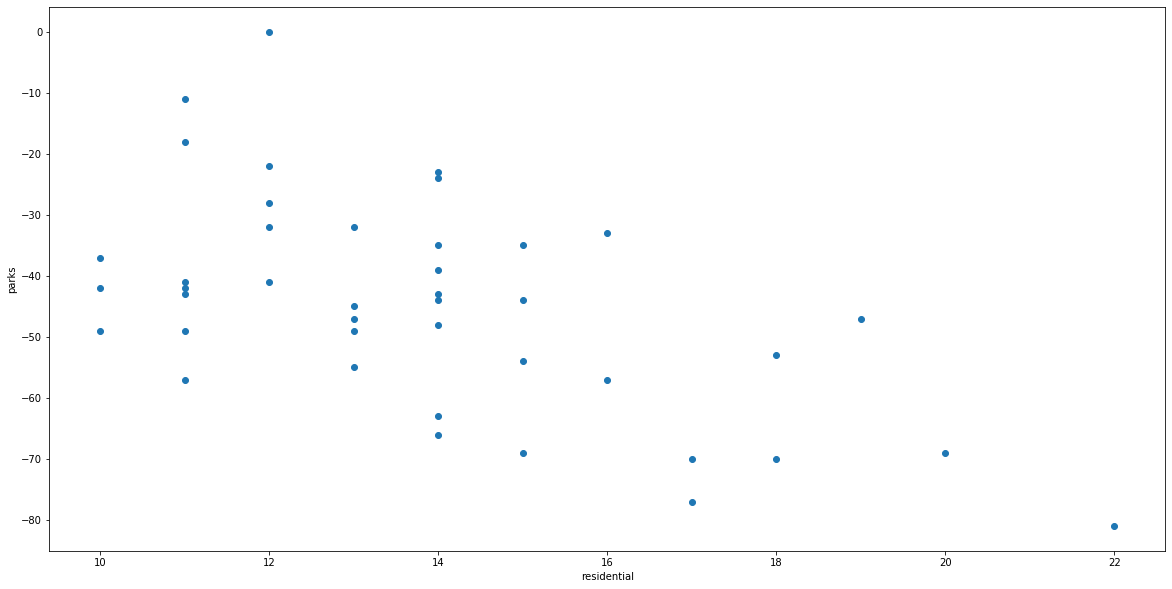

In [17]:

plt.figure(figsize=(20,10))
plt.xlabel('residential')
plt.ylabel('parks')
plt.scatter(res, parks, label = "Florida Counties Parks/Res")


In [18]:
# Let's see what this looks
states = google_us['state'].unique()
np.delete(states, 0) # remove "Total"

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [62]:
# read in the JHU data 
state = 'California'
county = 'Los Angeles County'
jhu_confirmed = pd.read_csv('../processed_data/csse_data/confirmed_US_zip.csv')
def get_confirmed_411(state, county):
    state_idx = jhu_confirmed['Province_State'] == state
    county_idx = jhu_confirmed['county'] == county
    state_county_idx = state_idx * county_idx
    if state_county_idx.any() == False: # no data found 
        return None
    return jhu_confirmed[state_county_idx].values[0][-9:-8][0]# 4/11/20 

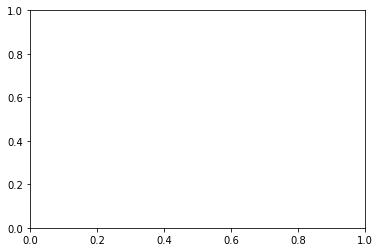

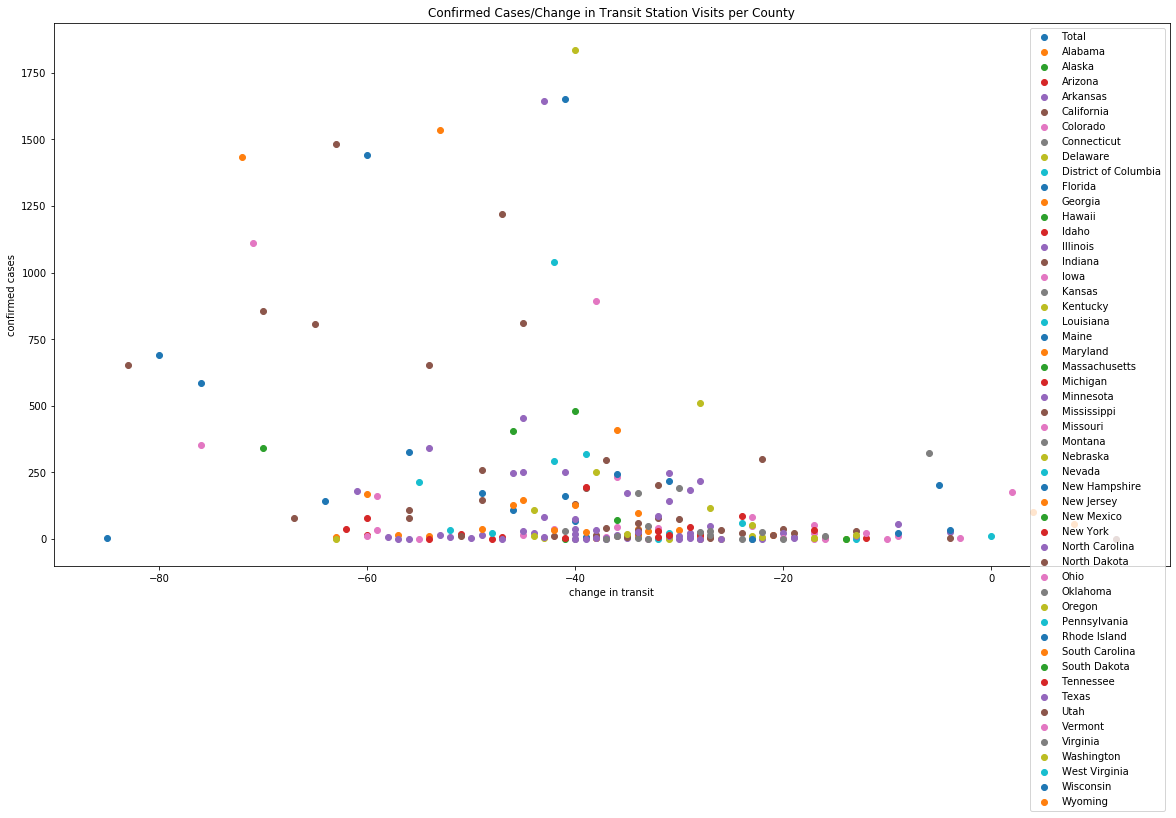

In [81]:
# aggregating the transit data and comparing to total cases 
from tqdm import tqdm_notebook
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
for state in tqdm_notebook(states): 
    #if not state in ['California']:
    #    continue
    state_idx = google_us['state'] == state
    state_df = google_us[state_idx]
    state_counties = state_df['county'].unique()

    transit = []
    confirmed = [] 
    for county in state_counties: 
        if county == 'New York County':
            continue
        county_df = get_data(state, county)
        transit_data = county_df.loc['transit stations'][-1:][0] # loc on the very last day
        confirmed_data = get_confirmed_411(state, county)
        if not (pd.isnull(res_data) or confirmed_data == None): # data exists for both sources
            if confirmed_data < 2000:
                #print(county)
                transit.append(transit_data)
                confirmed.append(confirmed_data)
    plt.scatter(transit, confirmed, label = state)



plt.legend()
plt.xlabel('change in transit')
plt.ylabel('confirmed cases')
plt.title('Confirmed Cases/Change in Transit Station Visits per County')
plt.show()

In [64]:
# read in the JHU data 
state = 'California'
county = 'Los Angeles County'
jhu_confirmed = pd.read_csv('../processed_data/csse_data/confirmed_US_zip.csv')
state_idx = jhu_confirmed['Province_State'] == state
county_idx = jhu_confirmed['county'] == county
state_county_idx = state_idx * county_idx
jhu_confirmed[state_county_idx].values[0][-9:-8][0]# 4/11/20 

8453

In [77]:
print(confirmed)

[0, 19, 22, 60, 44, 11, 37, 29, 98308, 4847, 194, 12]


In [51]:
# easy way to index 
ny_index = google_us['state'] == 'Michigan' 
gen_index = google_us['county'] == 'Genesee County'
mi_gen_index = mi_index * gen_index
google_us[gen_index].plot(title ='Genesee County')

[array([8453], dtype=object)]

NameError: name 'city_to_county' is not defined